T dim 10
x_dim 9


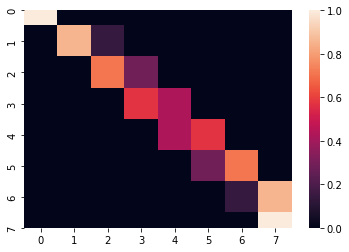

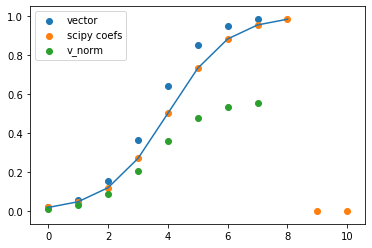

Condition number
 62.475138845718426
norm(yk) 1.7725695980871499


In [12]:
from vqls import *
from utils import *
lower = 0.
upper = 1. 
n_step = 8
f_i = 0.0  
MAX_ITER = 100

nq=3
# K = 2^n = dim(T)-2
# with dim(S) = KxK
# n = num qubits
# T = set of knots

scaled=False

label = 'sigmoid'
func = sigmoid_t


x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in x]

if scaled:
  norm = np.linalg.norm(y)
  y = y / norm
tck=splrep(x,y,k=1) #coeffs
#plt.scatter(range(len(tck[1])),tck[0], label = "scipy knots")


#############################################################################################
###################################### System Preparation ###################################
#############################################################################################

matrix,vector,v_norm = GeneralizedVQS_System(n_step,label,x,xx,scaled=scaled);

import seaborn as sns

sns.heatmap(matrix)
plt.show()
plt.plot(y)

plt.scatter(range(len(vector)), vector, label="vector")
plt.scatter(range(len(tck[1])),tck[1], label="scipy coefs")
plt.scatter(range(len(v_norm)), v_norm, label="v_norm")
plt.legend()
plt.show()
#############################################################################################
################################# VQLS and Linear Prob. Solving #############################
#############################################################################################

k_numb=np.linalg.cond(np.array(matrix))
print('Condition number\n',k_numb)
print('norm(yk)',np.linalg.norm(vector))




In [13]:
vqls_circuit = VQLS(matrix,v_norm,nq,opt='COBYLA') 


(<Figure size 720x288 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x7fa738168b90>)


tensor([0.08348763+0.j, 0.11363697+0.j, 0.12454732+0.j, 0.18836336+0.j,
        0.29215869+0.j, 0.45045094+0.j, 0.48332467+0.j, 0.63816783+0.j], requires_grad=True)

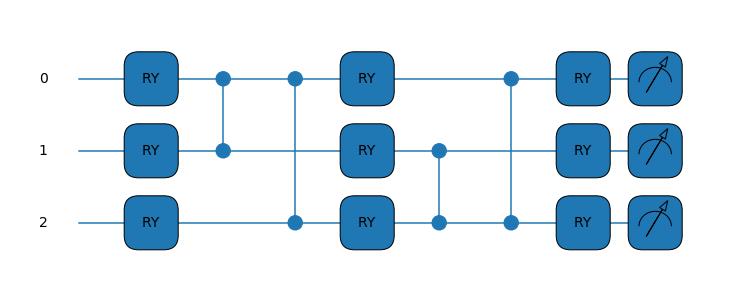

In [14]:
weights = np.load("weights_8.npy")
q = vqls_circuit.solution(weights, True)
q

In [15]:
c = np.linalg.solve(matrix,vector)
print('beta_classic                 :',c)
print('beta  qunatum')
y_c=np.dot(matrix,c) #classic


y_q=np.dot(matrix,q) #hybrid
                     #Quantum
y_fq=[]
for el in matrix:
  y_fq.append(vqls_circuit.direct_prod2(weights,el))
rss_full = np.sum(np.square(np.array(y_c) - np.array(y_fq)))
rss_hybr = np.sum(np.square(np.array(y_c) - np.array(y_q)))

print('RSS_q:',rss_full)
print('RSS_h:',rss_hybr)



beta_classic                 : [ 0.01798621  0.07173906 -0.0502415   0.65973407 -0.0375285   1.14655868
  0.7277244   0.98201379]
beta  qunatum
[0.08348763+0.j 0.11363697+0.j 0.12454732+0.j 0.18836336+0.j
 0.29215869+0.j 0.45045094+0.j 0.48332467+0.j 0.63816783+0.j]
[ 0.13256627+0.j -0.05138495+0.j  0.10417092+0.j  0.19952576+0.j
  0.29215869+0.j  0.45045094+0.j  0.48332467+0.j  0.63816783+0.j]
[ 0.18559568+0.j  0.12863528+0.j -0.08348763+0.j -0.11363697+0.j
  0.29215869+0.j  0.45045094+0.j  0.48332467+0.j  0.63816783+0.j]
[0.3259859 +0.j 0.17063271+0.j 0.22320469+0.j 0.29199113+0.j
 0.12070893+0.j 0.43508915+0.j 0.43675231+0.j 0.57871644+0.j]
[ 0.53565597+0.j  0.03654362+0.j  0.48332467+0.j  0.63816783+0.j
 -0.08348763+0.j -0.11363697+0.j -0.12454732+0.j -0.18836336+0.j]
[ 0.61604897+0.j  0.48401894+0.j -0.23873093+0.j  0.50827211+0.j
 -0.08348763+0.j -0.11363697+0.j -0.12454732+0.j -0.18836336+0.j]
[ 0.70894296+0.j -0.37183437+0.j -0.29215869+0.j -0.45045094+0.j
 -0.08348763+0.j -0.1

/home/fi_ippo/anaconda3/envs/tesi/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


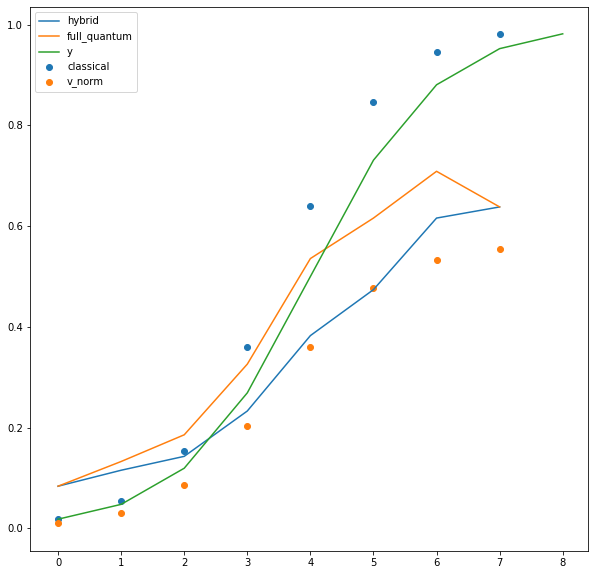

In [17]:
plt.figure(figsize=(10,10))
plt.plot(range(len(y_fq)),(y_q),label= "hybrid")
plt.plot(range(len(y_fq)),(y_fq), label="full_quantum")
plt.scatter(range(len(y_fq)),y_c, label="classical")
plt.scatter(range(len(v_norm)), v_norm, label="v_norm")

plt.plot(y, label="y")
plt.legend()